# Avocado Project

# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

# Inspiration/Label

The dataset can be seen in two angles to find the region and find the average price .
    
Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

# Dataset Link

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip

# Import the needed libraries for data preprocessing, model building and evaluation

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import re

# Load the data and get first five records using head method in pandas

In [11]:
avocadodf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\avocado.csv')
avocadodf.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [12]:
avocadodf.shape

(18249, 14)

# Get the information about the dataset using info method in pandas

In [17]:
avocadodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


The info() method output shows that there are 18249 records and 14 features in the dataset and there are no null records present in the dataset. The above output also shows that there are mixed datatype (int, float, object) of records present in the dataset.

# Check for the null record present in the dataset using isnull() method in pandas

In [21]:
avocadodf.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

The above output shows that there are no null records present in the dataset

# Check for the duplicate records in the dataset using duplicated method in pandas

In [25]:
avocadodf.duplicated().sum()

0

There are no duplicate records present in the dataset

In [28]:
# drop the unneccessary column from the dataset
avocadodf=avocadodf.drop(columns='Unnamed: 0',axis=1)

In [30]:
avocadodf.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

# Get the statistical summary of the data using describe method in pandas

In [33]:
avocadodf.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

The above result shows that:

1, The count of all the columns are same and there are no null records present in the dataset

2, The mean value is greater than median (50th percentile) for the columns Total Volume, Large Bags, XLarge Bags shows that there are right skewness present in the dataset.

3, The vlaue between 75th percentile and maximum is high and there is less amount of outliers present in the dataset.

In [36]:
avocadodf.shape

(18249, 13)

In [38]:
# Convert the object type data to datatime format
avocadodf['Date']=pd.to_datetime(avocadodf['Date'])

# plot to show the relationship between year and AveragePrice for each type using seaborn stripplot

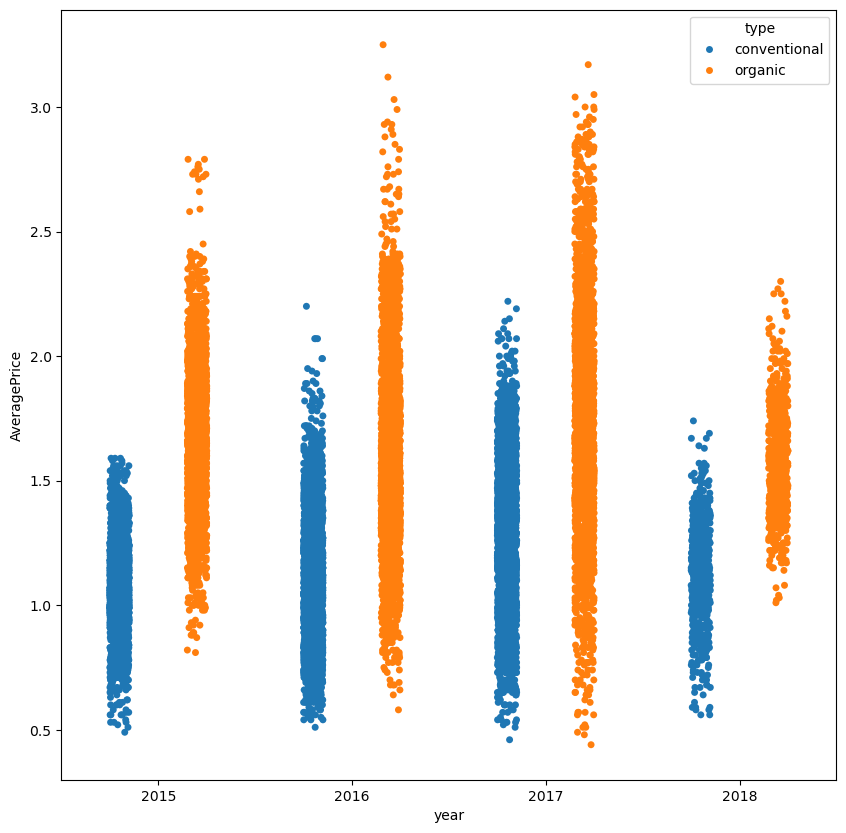

In [41]:
plt.figure(figsize=(10,10))
sns.stripplot(avocadodf,x='year',y='AveragePrice',hue='type',dodge=True)
plt.show()

The above output shows that the averageprice of the organic type Avocado product is more compared to the conventional type product for all the years.

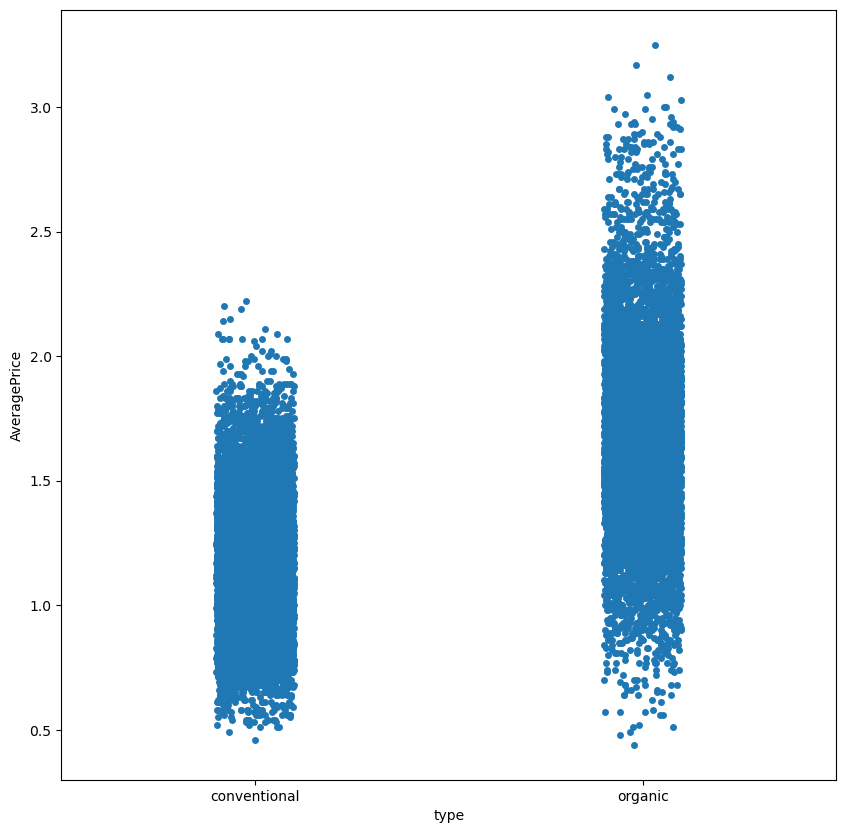

In [44]:
plt.figure(figsize=(10,10))
sns.stripplot(avocadodf,x='type',y='AveragePrice')
plt.show()

In general, the average price of the organic type product is more when compared to conventional type product.

# Scatterplot to show the relationship between the columns Small Bags, Large Bags, Xlarge Bags, Total Bags, Total Volume and the column Average Price for each type

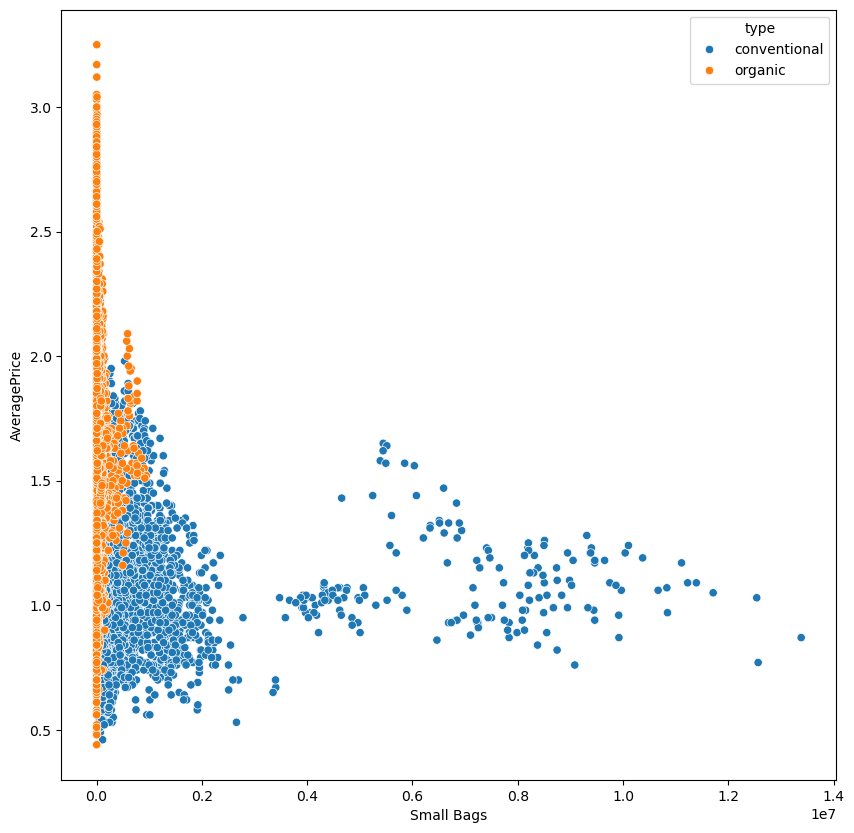

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(avocadodf,x='Small Bags', y='AveragePrice',hue='type')
plt.show()

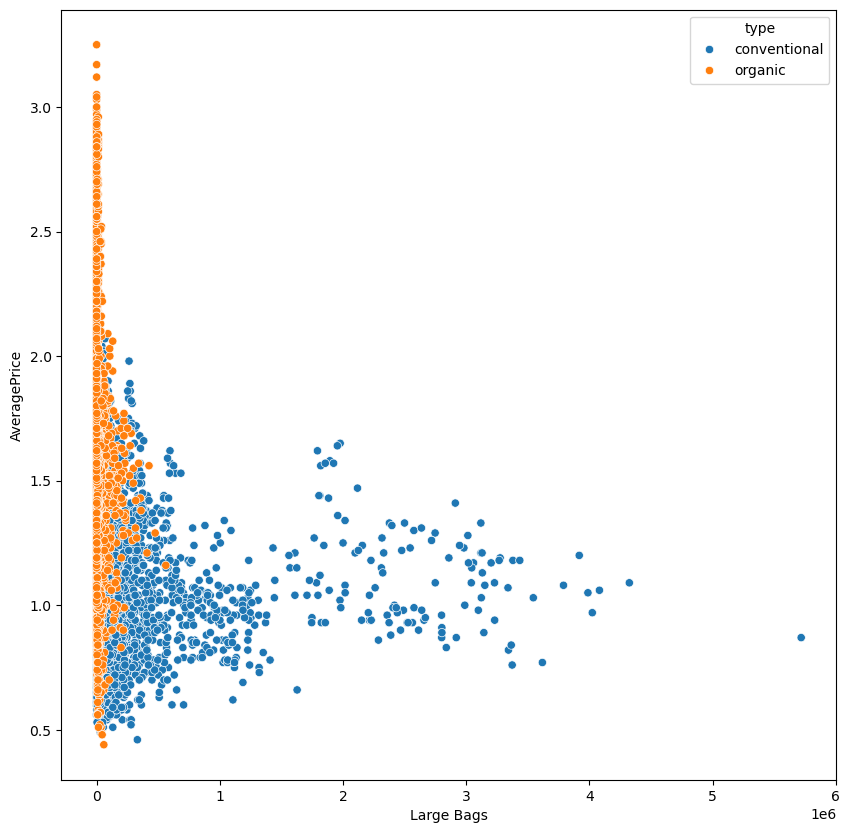

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(avocadodf,x='Large Bags', y='AveragePrice',hue='type')
plt.show()

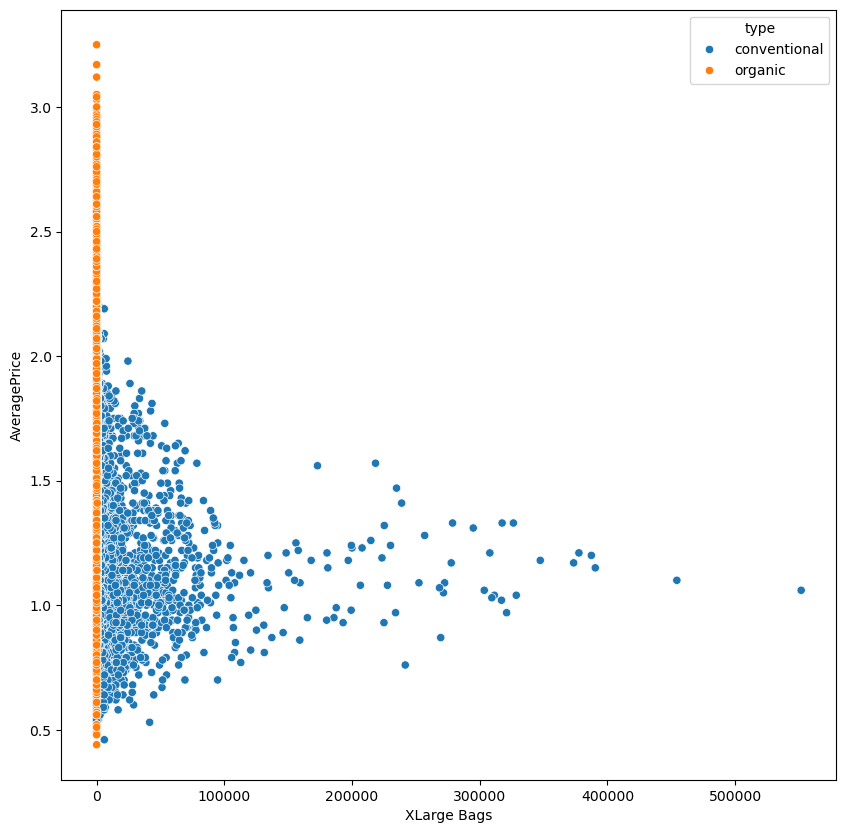

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(avocadodf,x='XLarge Bags', y='AveragePrice',hue='type')
plt.show()

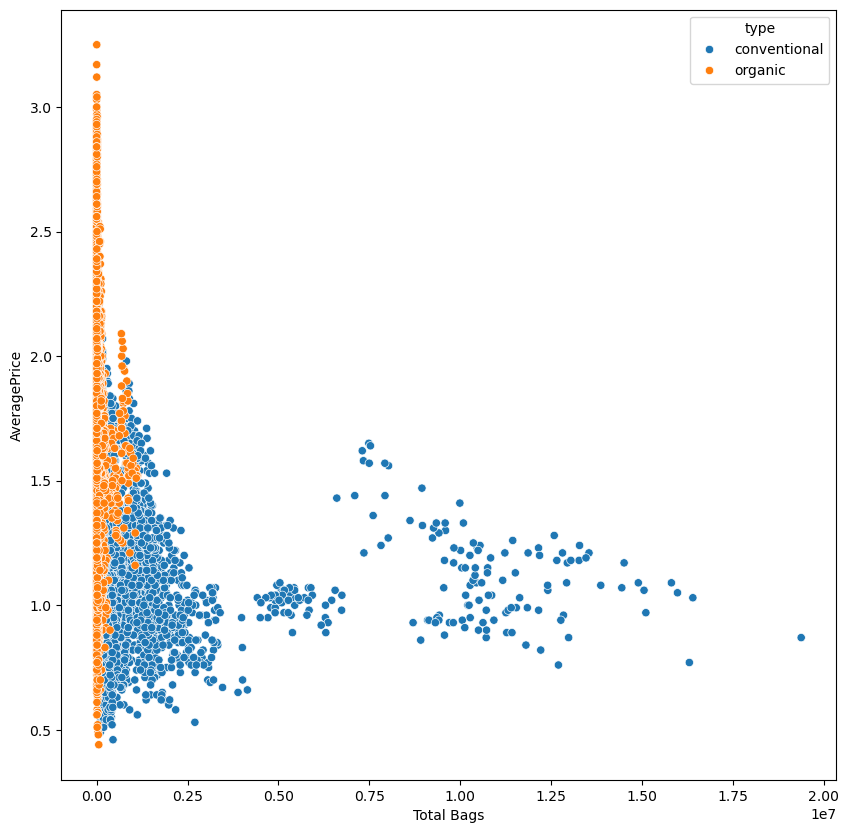

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(avocadodf,x='Total Bags', y='AveragePrice',hue='type')
plt.show()

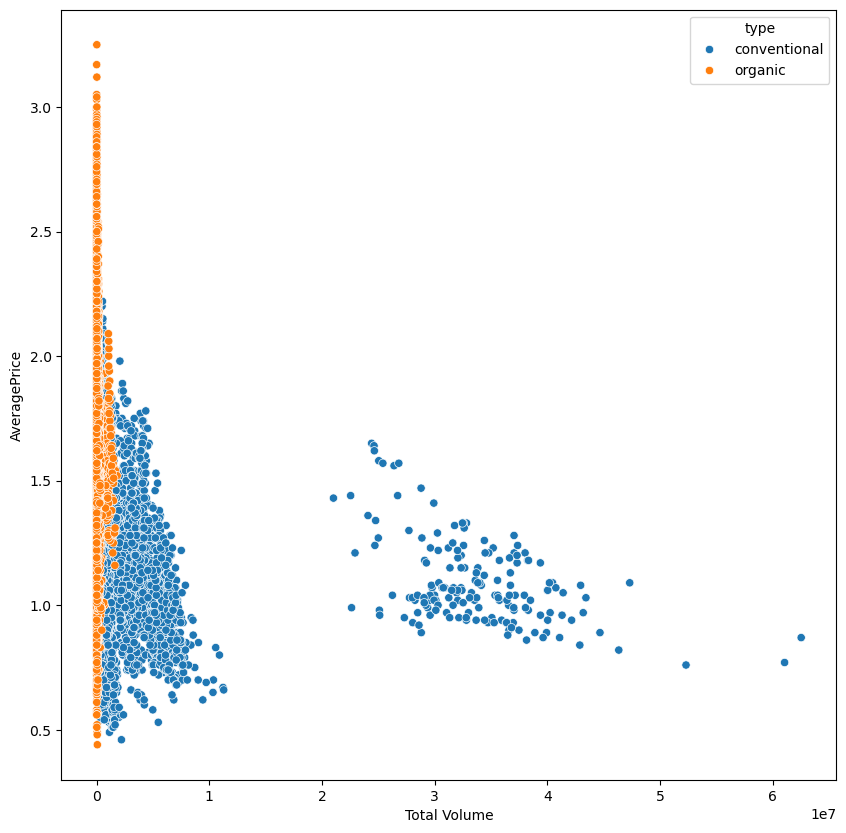

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(avocadodf,x='Total Volume', y='AveragePrice',hue='type')
plt.show()

The result from scatterplot shows that the five columns Small Bags, Large Bags, XLarge Bags, Total Bags and Total Volume are highly correlated with each other. The relation between the four columns and the column AveragePrice is more in the range between 0 and 10000 and it also shows that the average price for the organic type product is more when compared to conventional type product for all four columns.

# Scatterplot to show the relationship between the column Total Volume and the column region

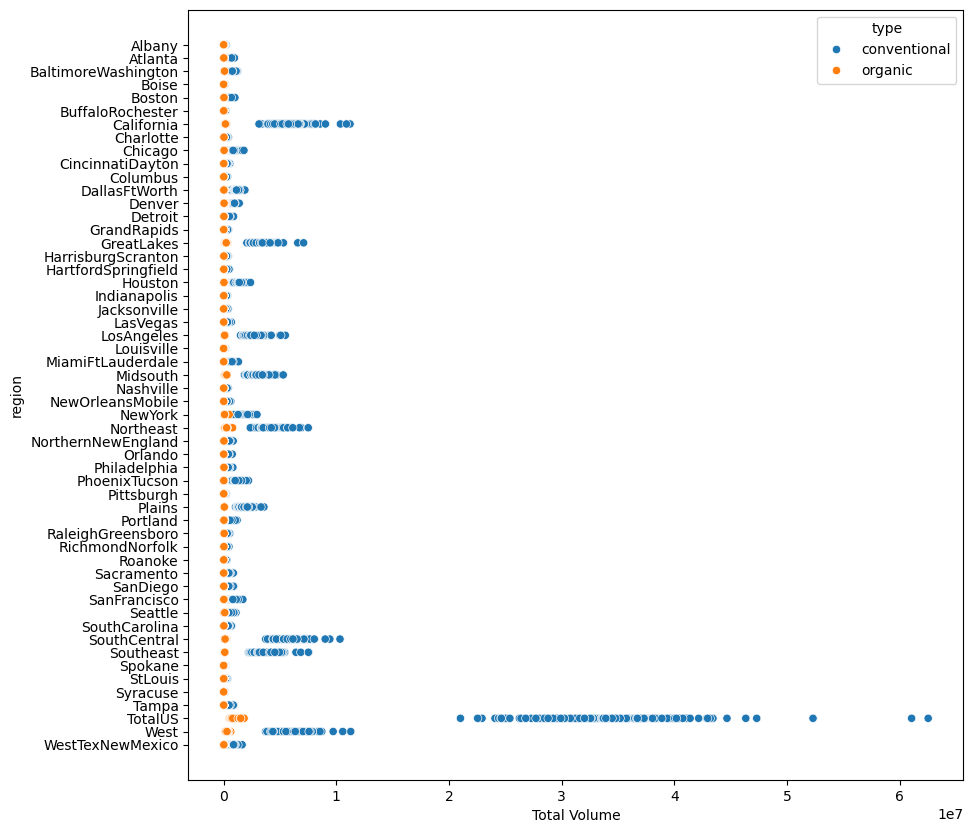

In [60]:
plt.figure(figsize=(10,10))
sns.scatterplot(avocadodf,x='Total Volume',y='region',hue='type')
plt.show()

The above result from the scatterplot shows that the Total Volume is high for the region TotalUS for the conventional type product.

# Scatterplot to show the relationship between the column Total Volume and the column region for each year

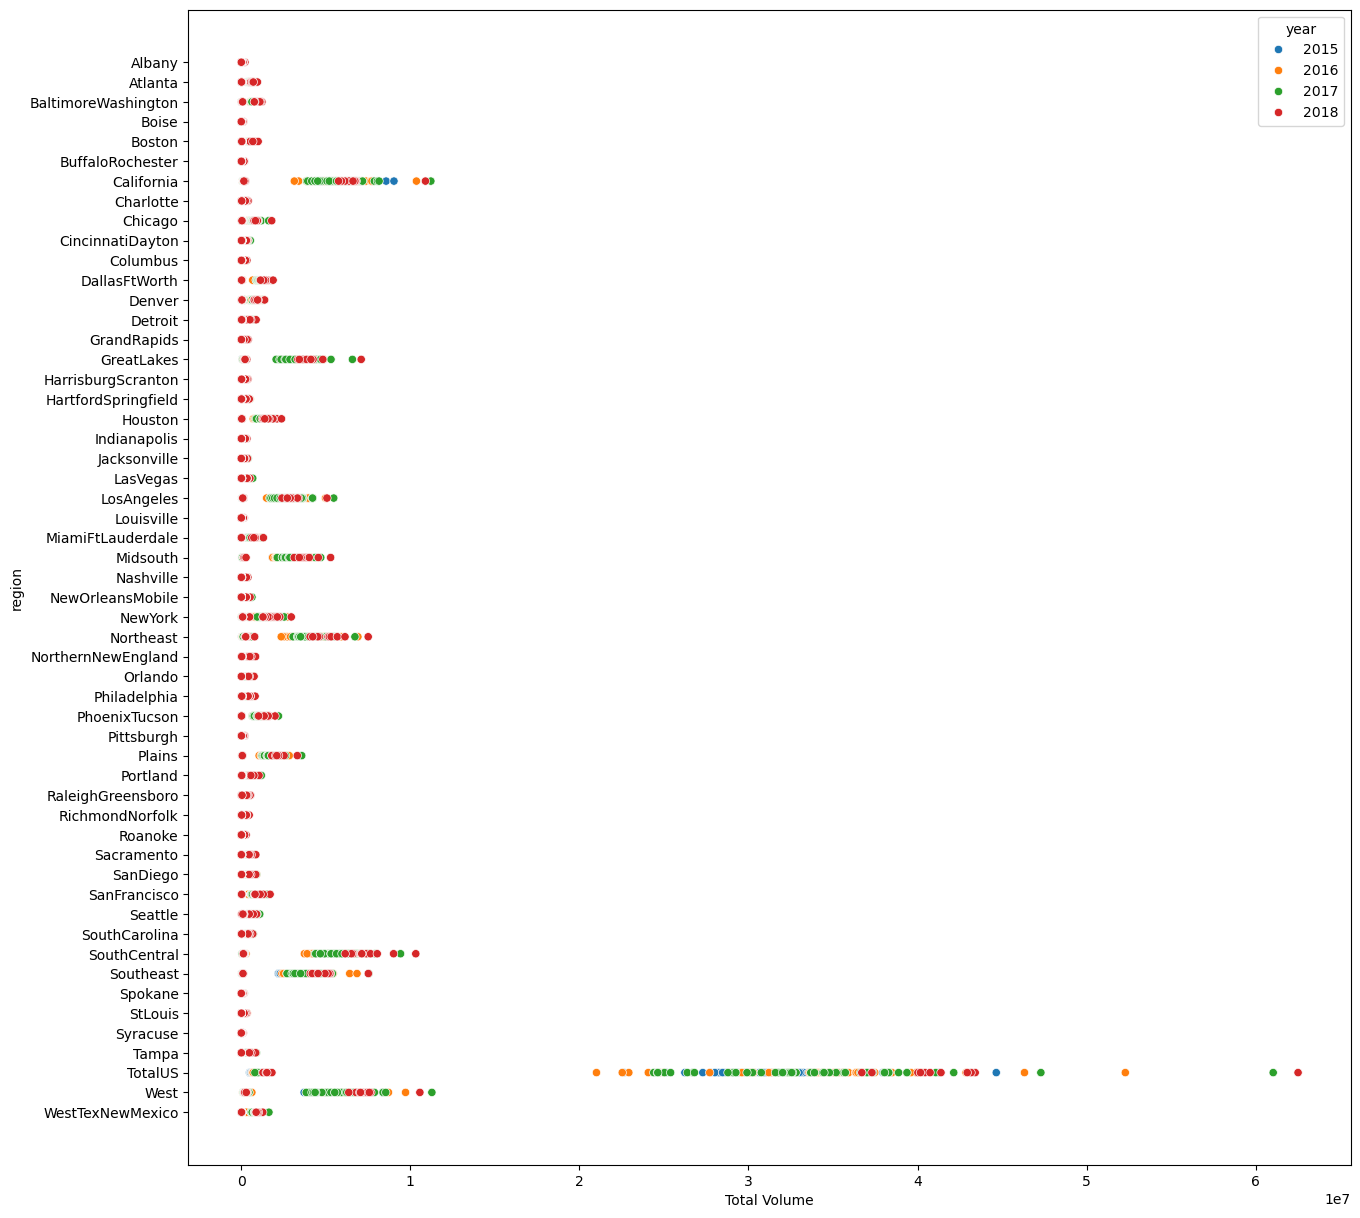

In [64]:
plt.figure(figsize=(15,15))
sns.scatterplot(avocadodf,x='Total Volume',y='region',hue='year',palette='tab10')
plt.show()

It is clear from the above scatterplot that the Total volume for the year 2017 is higher for the TotalUs region.

In [67]:
avocadodf['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [69]:
avocadodf['type'].unique()

array(['conventional', 'organic'], dtype=object)

# Label encode the categorical columns in the dataset

In [72]:
avocadocol=avocadodf[['type','region']]

In [74]:
le=LabelEncoder()
avocadodf[['type','region']]=avocadocol.apply(le.fit_transform)
avocadodf.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8696.87     8603.62       93.25          0.0     0  2015       0  
1     9505.56     9408.07       97.49          0.0     0  2015       0  
2     8145.35     8042.21      103.14          0.0     0  2015       0  
3     5811.16     5677.40      133.76          0.0     0  2015       0  
4     6183.95     5986.26      197.69          0.0     0  2015       0

In [76]:
avocadodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  int32         
 11  year          18249 non-null  int64         
 12  region        18249 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1)
memory usage: 1.7 MB


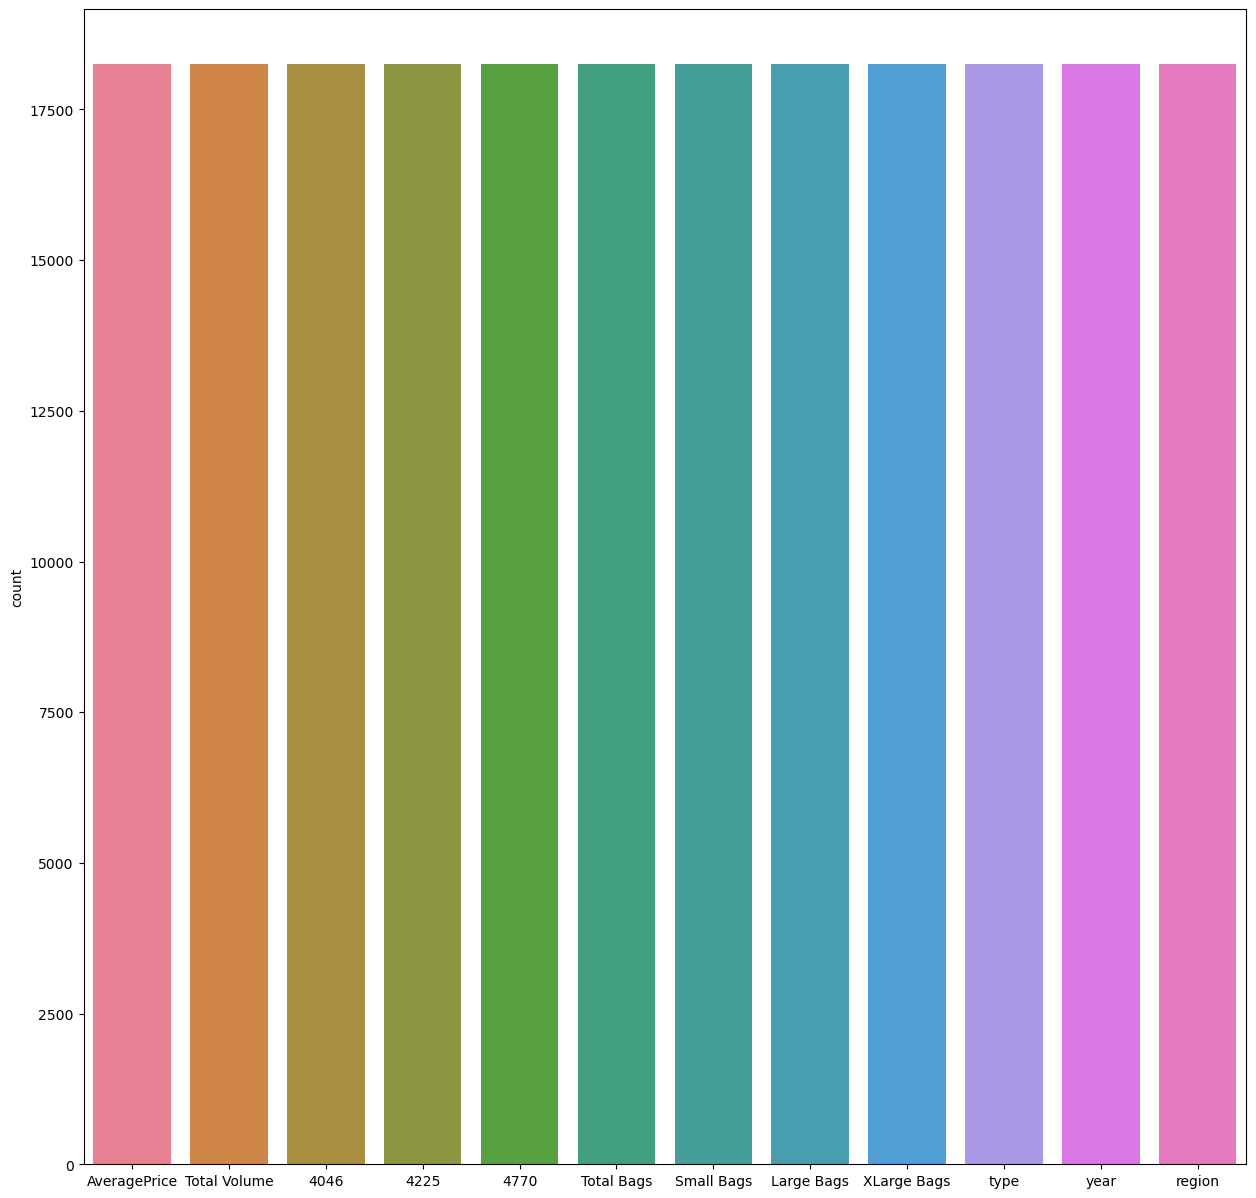

In [78]:
plt.figure(figsize=(15,15))
sns.countplot(avocadodf)
plt.show()

The countplot output shows that there are 18249 records and 13 features in the dataset

# Seaborn Heatmap to show correlation between each features in the dataset

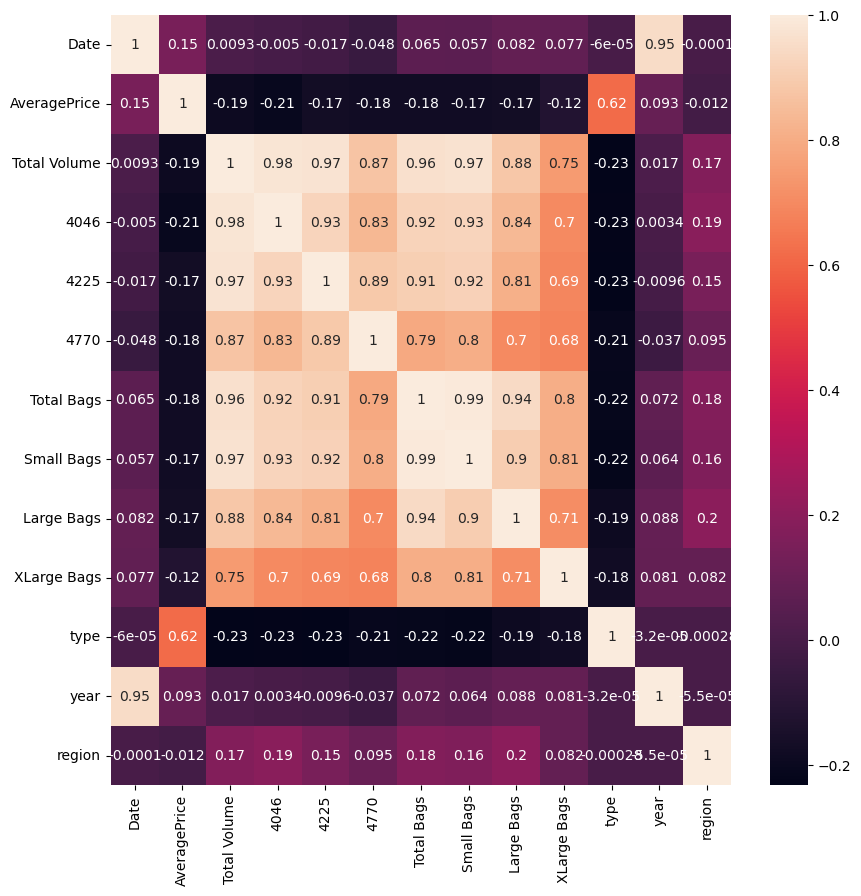

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(avocadodf.corr(),annot=True)
plt.show()

The observation from the above result are:

1, The columns Total Bags, Small Bags, Large Bags, XLarge Bags are positive correlated with each other.

2, The column type is positive correlated with the target column AveragePrice.

3, The column region is negatively correlated with the column Data.

# Pairplot to show the relationship between each features with other features in the dataset

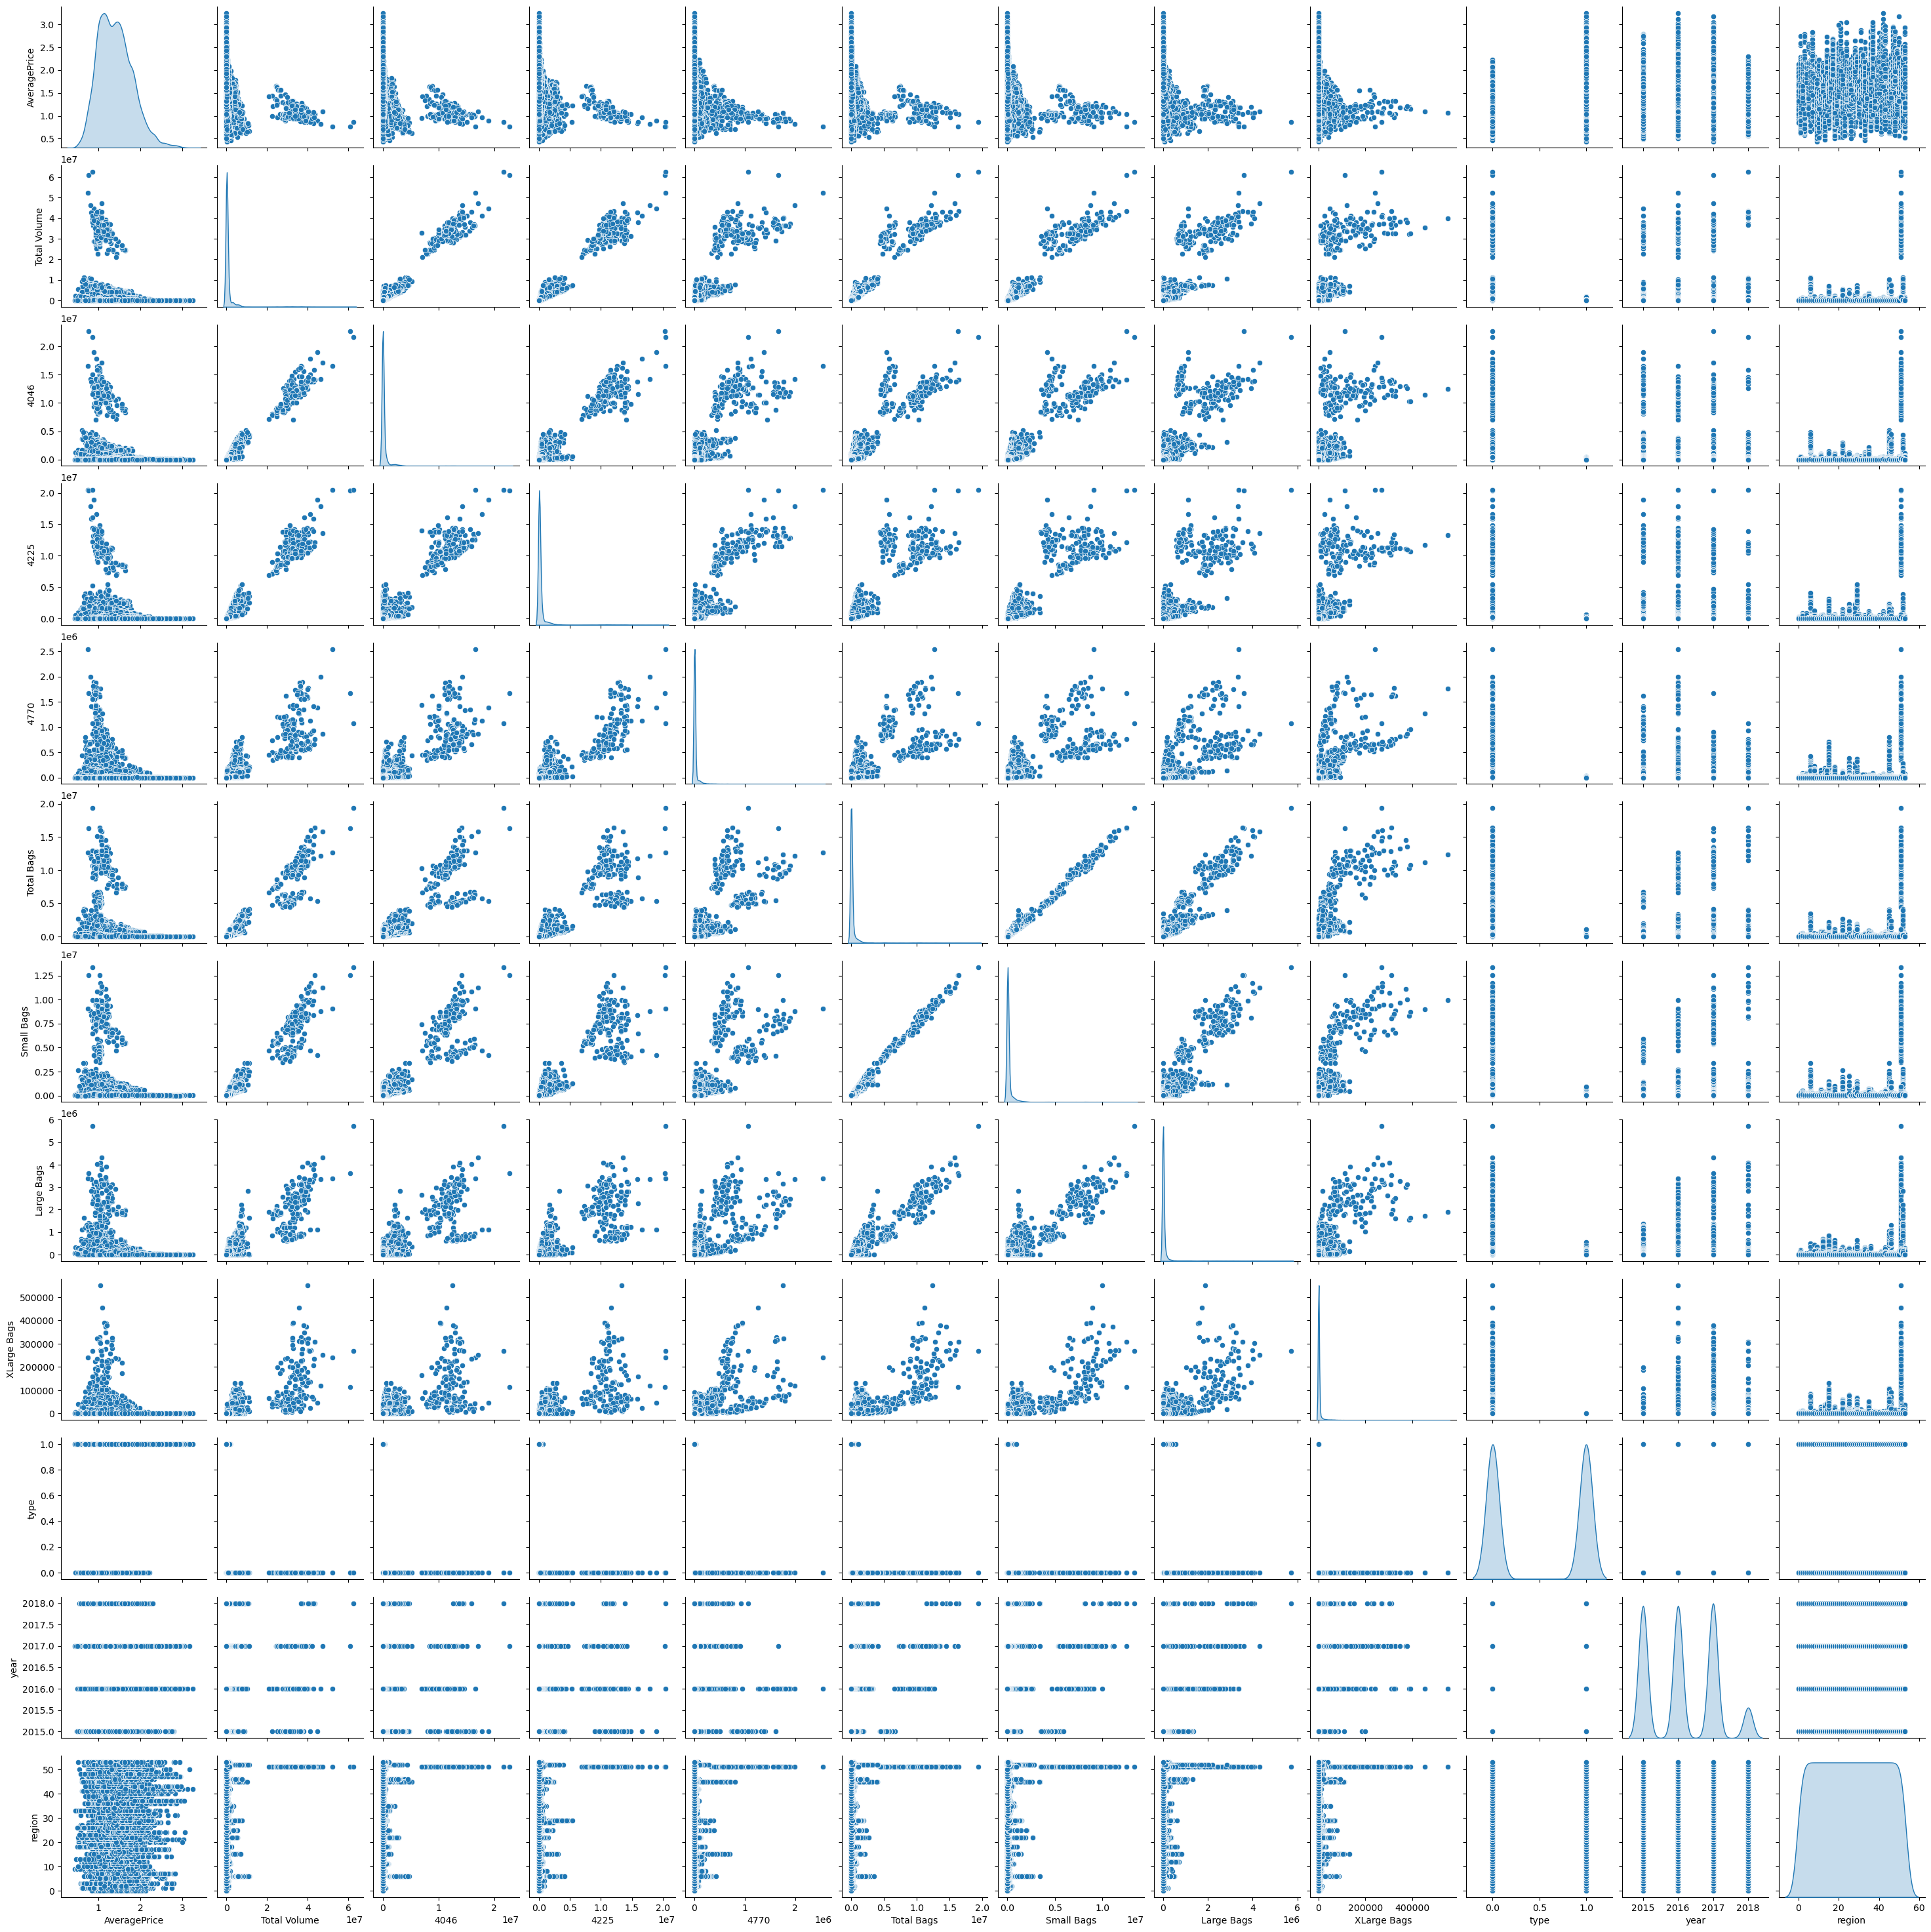

In [46]:
sns.pairplot(avocadodf,diag_kind='kde')

# check for the skewness in the dataset using distplot

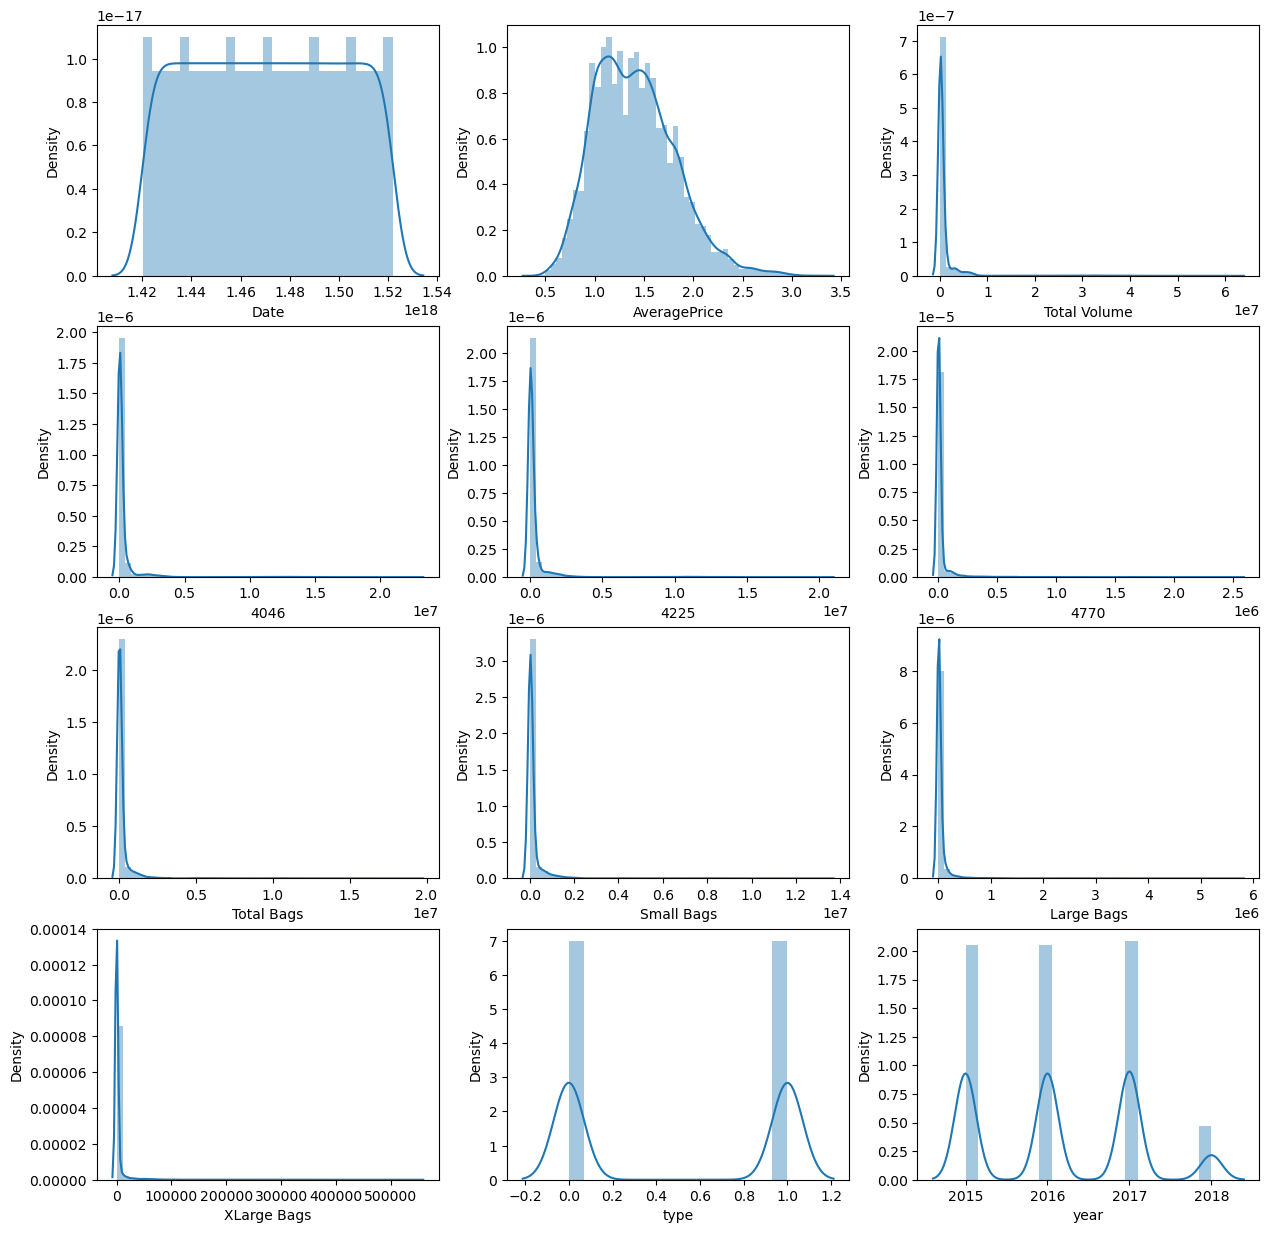

In [88]:
plt.figure(figsize=(15,15))
p=1
for i in avocadodf:
    if p<=12:
        plt.subplot(4,3,p)
        sns.distplot(avocadodf[i])
    p=p+1
plt.show()

In [90]:
avocadodf=avocadodf.drop(columns='Date',axis=1)

# Check for the skewness in the dataset using skew method

In [95]:
avocadodf.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [97]:
avocadodf['Total Volume']=boxcox(avocadodf['Total Volume'],0)
avocadodf['4046']=np.log1p(avocadodf['4046'])
avocadodf['4225']=np.log1p(avocadodf['4225'])
avocadodf['4770']=np.log1p(avocadodf['4770'])
avocadodf['Total Bags']=np.log1p(avocadodf['Total Bags'])
avocadodf['Small Bags']=np.log1p(avocadodf['Small Bags'])
avocadodf['Large Bags']=np.log1p(avocadodf['Large Bags'])
avocadodf['XLarge Bags']=np.log1p(avocadodf['XLarge Bags'])

In [99]:
avocadodf.skew()

AveragePrice    0.580303
Total Volume    0.087954
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
dtype: float64

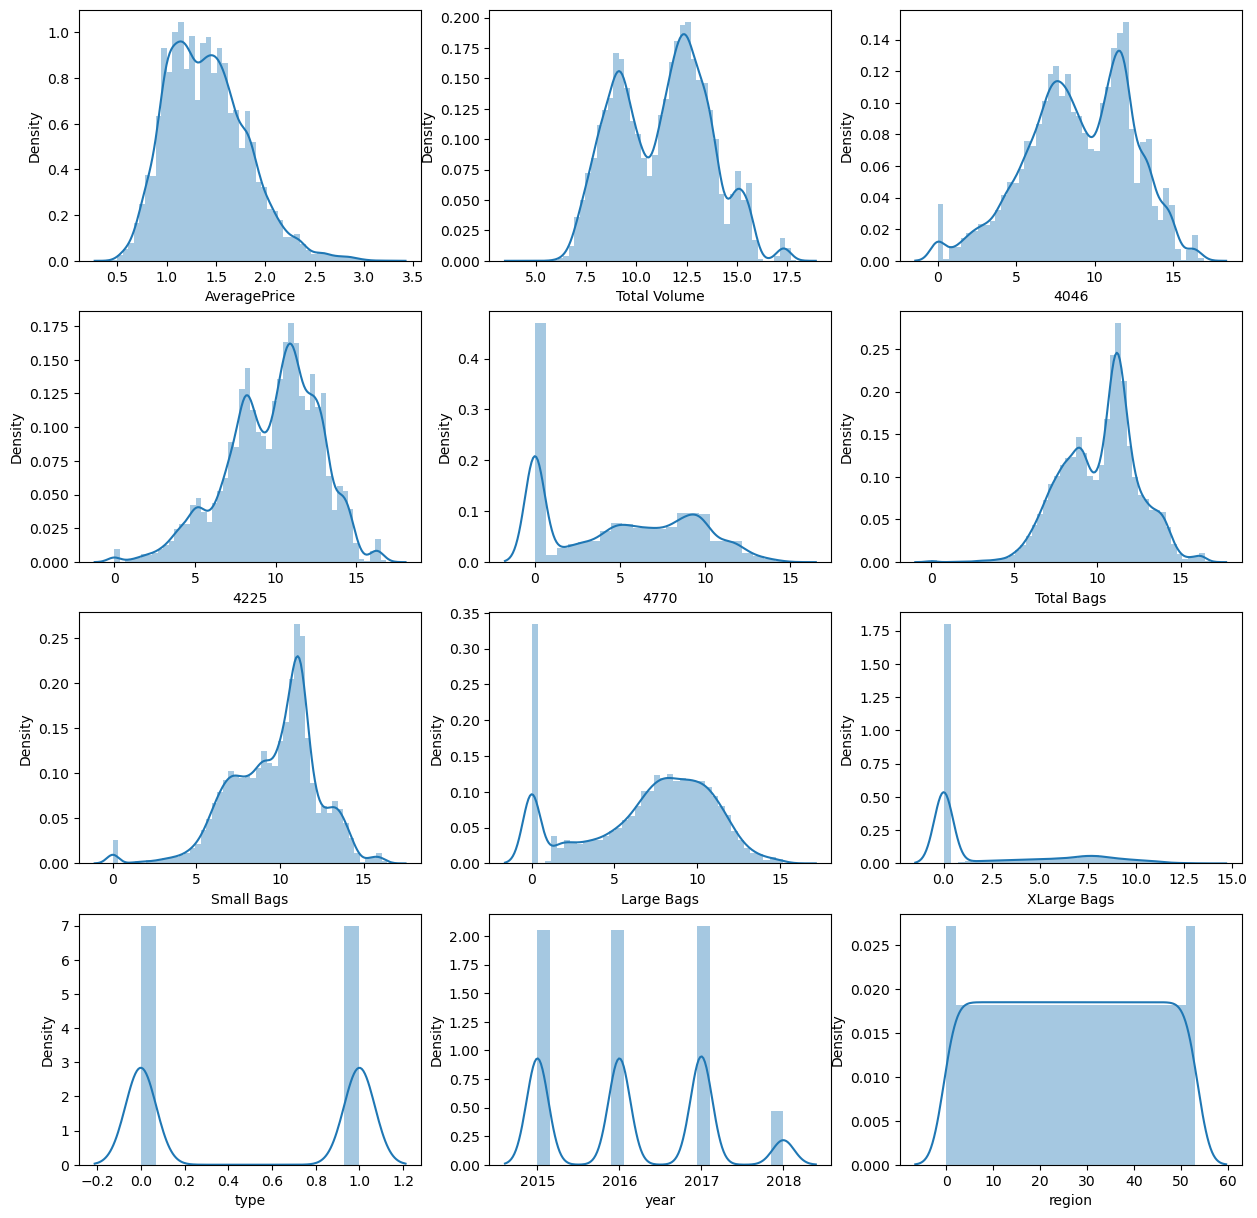

In [101]:
# Skewness is removed from dataset
plt.figure(figsize=(15,15))
p=1
for i in avocadodf:
    if p<=12:
        plt.subplot(4,3,p)
        sns.distplot(avocadodf[i])
    p=p+1
plt.show()

# Check for the outliers in the dataset using boxplot

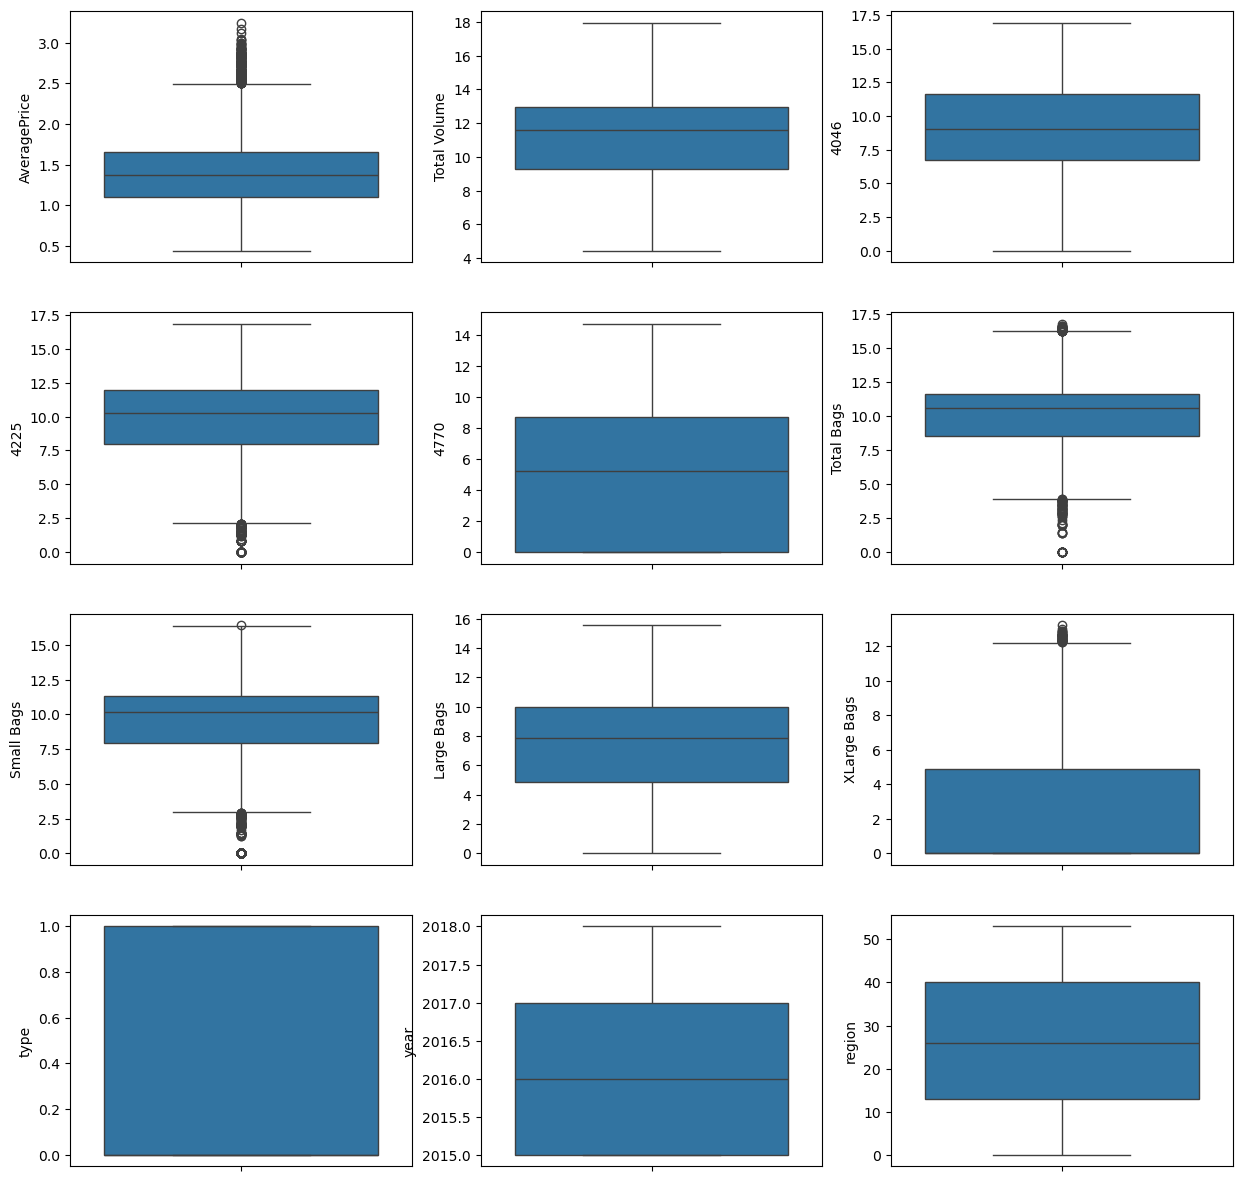

In [104]:
plt.figure(figsize=(15,15))
p=1
for i in avocadodf:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(avocadodf[i])
    p=p+1
plt.show()

# Detect and remove outliers using zscore

In [107]:
columns=['AveragePrice','Total Volume','4046','4225','Large Bags','XLarge Bags']

z=np.abs(zscore(avocadodf[columns]))
z

AveragePrice  Total Volume      4046      4225  Large Bags  XLarge Bags
0          0.188689      0.107246  0.609752  0.374936    0.669747     0.645526
1          0.139020      0.175910  0.737707  0.305200    0.658279     0.645526
2          1.182069      0.158716  0.688840  0.618892    0.643743     0.645526
3          0.809551      0.017088  0.583598  0.472808    0.576571     0.645526
4          0.312861      0.207518  0.638425  0.298852    0.475393     0.645526
...             ...           ...       ...       ...         ...          ...
18244      0.556347      0.684959  0.407310  0.878279    0.272479     0.645526
18245      0.755023      0.775031  0.568306  0.594835    0.346517     0.645526
18246      1.152375      0.778855  0.568251  0.712597    0.872380     0.645526
18247      1.301382      0.707751  0.494407  0.644192    0.829787     0.645526
18248      0.531512      0.674495  0.304151  0.726698    0.995429     0.645526

[18249 rows x 6 columns]

In [109]:
np.where(z>=3)

(array([ 5482,  5483,  5484,  5485,  8344,  8345, 10375, 10377, 10380,
        10382, 10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531,
        10532, 10533, 10534, 10535, 10536, 10562, 10563, 10566, 11320,
        11321, 11323, 11324, 11325, 11326, 11327, 11328, 11329, 11330,
        11331, 11332, 11734, 11735, 11736, 11737, 11738, 11739, 11740,
        11742, 11743, 11744, 11746, 11747, 11748, 11749, 11751, 11771,
        12821, 12823, 13033, 13035, 13037, 13038, 13225, 13228, 13338,
        13341, 13342, 13343, 13345, 13346, 13349, 13350, 13351, 13354,
        13356, 13357, 13359, 13360, 13361, 13363, 13365, 13366, 13367,
        13369, 13381, 13382, 13383, 13385, 13395, 13657, 13661, 14019,
        14020, 14073, 14074, 14119, 14120, 14121, 14122, 14123, 14124,
        14125, 14126, 14128, 14129, 14177, 14385, 14699, 14701, 14702,
        14807, 14911, 14912, 14913, 14914, 14915, 14916, 14917, 14918,
        14919, 15124, 15125, 15127, 15128, 15129, 15130, 15510, 15511,
      

In [111]:
avocado_df=avocadodf[(z<=3).all(axis=1)]
avocado_df.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070329  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912849  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680304  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277104  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840357  6.848515  10.688288  4.340944    8.729874   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0    9.060055    4.545951          0.0     0  2015       0  
1    9.149429    4.589955          0.0     0  2015       0  
2    8.992584    4.645736          0.0     0  2015       0  
3    8.644425    4.903495          0.0     0  2015       0  
4    8.697389    5.291746          0.0     0  2015       0

In [113]:
print("percentage of data loss", ((avocadodf.shape[0]-avocado_df.shape[0])/avocadodf.shape[0])*100)

percentage of data loss 1.1891062523973916


In [115]:
avocadodf.shape

(18249, 12)

In [117]:
avocado_df.shape

(18032, 12)

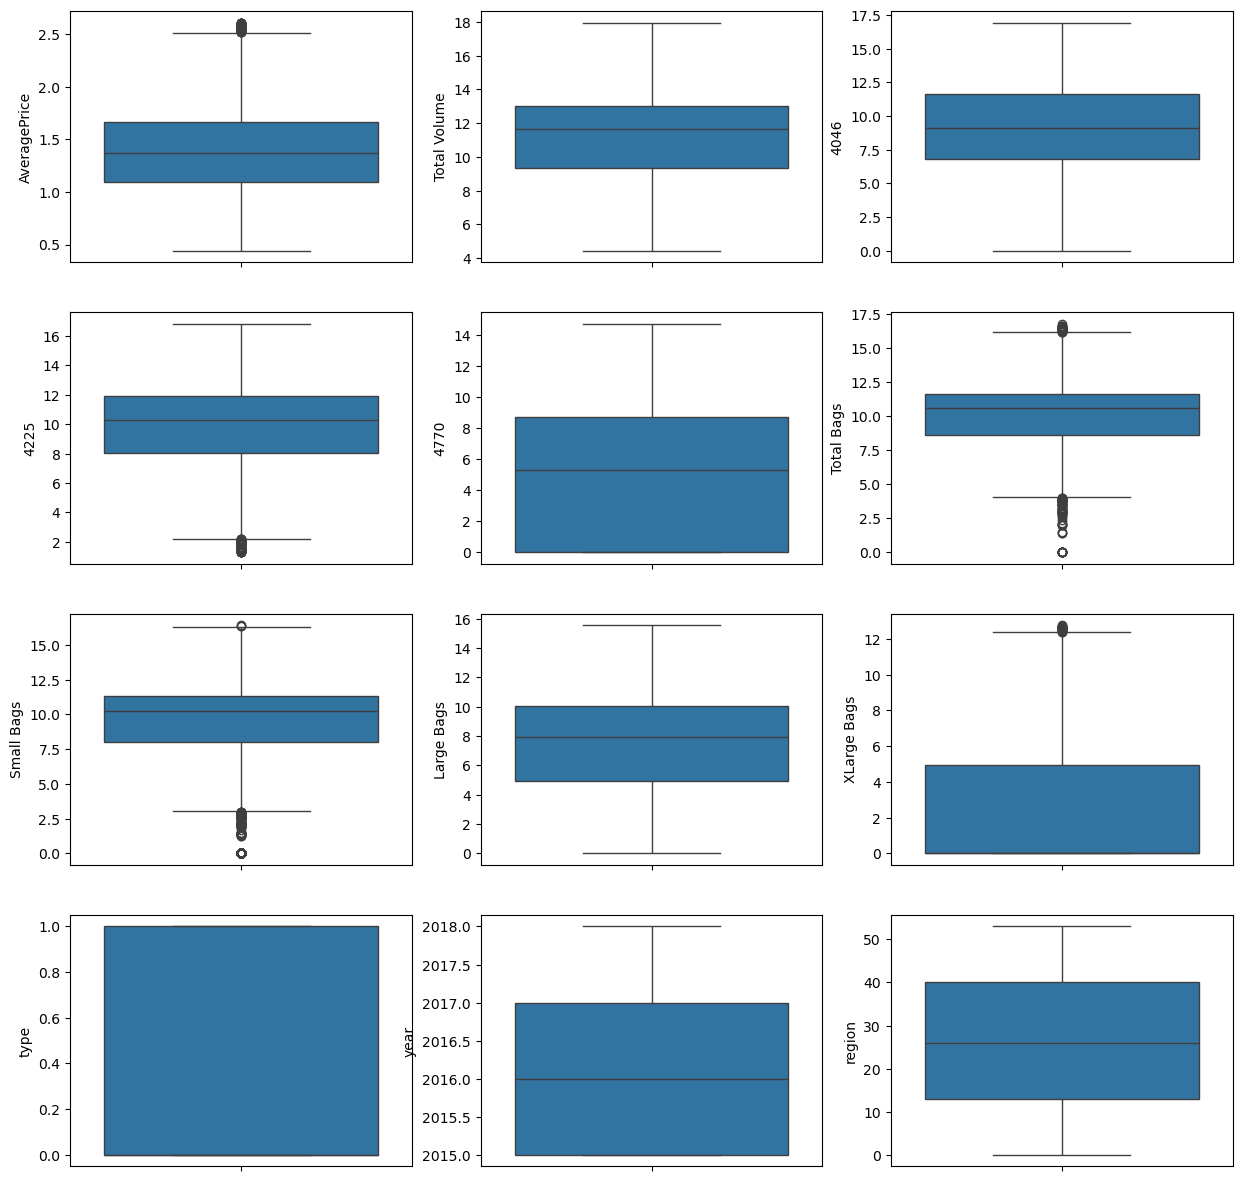

In [119]:
# Outliers are removed in the dataset
plt.figure(figsize=(15,15))
p=1
for i in avocado_df:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(avocado_df[i])
    p=p+1
plt.show()

# Regression Problem

# Prediction of AveragePrice

# Split the input data as x(input) and y(Label/output)

In [125]:
x=avocado_df.drop(columns='AveragePrice',axis=1)
x.head()

Total Volume      4046       4225      4770  Total Bags  Small Bags  \
0     11.070329  6.944801  10.905146  3.895080    9.070833    9.060055   
1     10.912849  6.515127  10.706381  4.083115    9.159737    9.149429   
2     11.680304  6.679222  11.600485  4.879007    9.005325    8.992584   
3     11.277104  7.032624  11.184108  4.298373    8.667708    8.644425   
4     10.840357  6.848515  10.688288  4.340944    8.729874    8.697389   

   Large Bags  XLarge Bags  type  year  region  
0    4.545951          0.0     0  2015       0  
1    4.589955          0.0     0  2015       0  
2    4.645736          0.0     0  2015       0  
3    4.903495          0.0     0  2015       0  
4    5.291746          0.0     0  2015       0

In [127]:
x.head()

Total Volume      4046       4225      4770  Total Bags  Small Bags  \
0     11.070329  6.944801  10.905146  3.895080    9.070833    9.060055   
1     10.912849  6.515127  10.706381  4.083115    9.159737    9.149429   
2     11.680304  6.679222  11.600485  4.879007    9.005325    8.992584   
3     11.277104  7.032624  11.184108  4.298373    8.667708    8.644425   
4     10.840357  6.848515  10.688288  4.340944    8.729874    8.697389   

   Large Bags  XLarge Bags  type  year  region  
0    4.545951          0.0     0  2015       0  
1    4.589955          0.0     0  2015       0  
2    4.645736          0.0     0  2015       0  
3    4.903495          0.0     0  2015       0  
4    5.291746          0.0     0  2015       0

In [129]:
y=avocado_df['AveragePrice']
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

# Check for multicollinearity in the dataset using variance inflation factor

In [132]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Columns"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [134]:
calc_vif(x)

Columns          VIF
0   Total Volume  1141.356640
1           4046    51.807056
2           4225   125.863648
3           4770    10.111574
4     Total Bags   517.407646
5     Small Bags   157.329925
6     Large Bags    12.537617
7    XLarge Bags     2.758709
8           type     6.551010
9           year   136.568117
10        region     4.228024

In [136]:
x=x.drop(columns='Total Volume',axis=1)
x.head()

4046       4225      4770  Total Bags  Small Bags  Large Bags  \
0  6.944801  10.905146  3.895080    9.070833    9.060055    4.545951   
1  6.515127  10.706381  4.083115    9.159737    9.149429    4.589955   
2  6.679222  11.600485  4.879007    9.005325    8.992584    4.645736   
3  7.032624  11.184108  4.298373    8.667708    8.644425    4.903495   
4  6.848515  10.688288  4.340944    8.729874    8.697389    5.291746   

   XLarge Bags  type  year  region  
0          0.0     0  2015       0  
1          0.0     0  2015       0  
2          0.0     0  2015       0  
3          0.0     0  2015       0  
4          0.0     0  2015       0

In [138]:
calc_vif(x)

Columns         VIF
0         4046   28.802397
1         4225   54.394519
2         4770   10.111305
3   Total Bags  346.235193
4   Small Bags  156.905454
5   Large Bags   12.398820
6  XLarge Bags    2.748042
7         type    6.401596
8         year   77.542749
9       region    4.220877

In [140]:
x=x.drop(columns='Total Bags',axis=1)
x.head()

4046       4225      4770  Small Bags  Large Bags  XLarge Bags  type  \
0  6.944801  10.905146  3.895080    9.060055    4.545951          0.0     0   
1  6.515127  10.706381  4.083115    9.149429    4.589955          0.0     0   
2  6.679222  11.600485  4.879007    8.992584    4.645736          0.0     0   
3  7.032624  11.184108  4.298373    8.644425    4.903495          0.0     0   
4  6.848515  10.688288  4.340944    8.697389    5.291746          0.0     0   

   year  region  
0  2015       0  
1  2015       0  
2  2015       0  
3  2015       0  
4  2015       0

In [142]:
calc_vif(x)

Columns        VIF
0         4046  28.442587
1         4225  52.143792
2         4770  10.109126
3   Small Bags  45.478753
4   Large Bags   7.755380
5  XLarge Bags   2.731841
6         type   6.401219
7         year  61.852710
8       region   4.217255

# Apply standardScaler technique to standardize the x input data

In [145]:
sc=StandardScaler()
x_scales=sc.fit_transform(x)
x_scaled=pd.DataFrame(x_scales,columns=x.columns)
x_scaled.head()

4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0 -0.621970  0.364645 -0.290628   -0.260686   -0.681178    -0.649974   
1 -0.750225  0.293316 -0.245252   -0.225831   -0.669676    -0.649974   
2 -0.701243  0.614176 -0.053192   -0.287000   -0.655096    -0.649974   
3 -0.595755  0.464754 -0.193307   -0.422780   -0.587723    -0.649974   
4 -0.650710  0.286823 -0.183034   -0.402124   -0.486242    -0.649974   

       type      year   region  
0 -0.988531 -1.217681 -1.69363  
1 -0.988531 -1.217681 -1.69363  
2 -0.988531 -1.217681 -1.69363  
3 -0.988531 -1.217681 -1.69363  
4 -0.988531 -1.217681 -1.69363

# Instantiate the regression models

In [148]:
lr=LinearRegression()
knn=KNeighborsRegressor()
ls=Lasso()
rg=Ridge()
els=ElasticNet()
svr=SVR()
lsvr=LinearSVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
ada=AdaBoostRegressor()
gr=GradientBoostingRegressor()
bag=BaggingRegressor()
etr=ExtraTreesRegressor()

# Apply cross validation technique to get the best performing model and to avoid overfitting

In [151]:
models=[lr,knn,ls,rg,els,svr,lsvr,dtr,rfr,ada,gr,bag,etr]

for i in models:
    cvs=cross_val_score(i,x_scaled,y,cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n Mean of the cross validation is",np.mean(cvs),"\n")

Cross validation score for LinearRegression() is [-0.25871411  0.04057774  0.42848434  0.10400586  0.10261577] 
 Mean of the cross validation is 0.08339392105799204 

Cross validation score for KNeighborsRegressor() is [-0.13606906  0.18400492  0.39171884  0.25481168 -0.13608001] 
 Mean of the cross validation is 0.11167727537099637 

Cross validation score for Lasso() is [-3.74225829 -0.72825749 -0.0229494  -0.53881802 -0.8408728 ] 
 Mean of the cross validation is -1.1746311988804972 

Cross validation score for Ridge() is [-0.25878269  0.04064056  0.42849114  0.10400314  0.10261449] 
 Mean of the cross validation is 0.08339333043963201 

Cross validation score for ElasticNet() is [-3.74225829 -0.72825749 -0.0229494  -0.53881802 -0.8408728 ] 
 Mean of the cross validation is -1.1746311988804972 

Cross validation score for SVR() is [-0.50753791  0.30964519  0.26670307  0.38191113 -0.03955264] 
 Mean of the cross validation is 0.08223376983473915 

Cross validation score for LinearSVR

# Get the best random state and maximum accuracy for a model selection

In [154]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    etr.fit(x_train,y_train)
    y_pred=etr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accurancy score is",maxacc,"and random state is",maxrs)

Accurancy score is 0.6879770150054645 and random state is 161


In [168]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=107)

In [170]:
x_train.shape

(12622, 9)

In [172]:
x_test.shape

(5410, 9)

In [174]:
y_train.shape

(12622,)

In [176]:
y_test.shape

(5410,)

# Build Model fit the data on train data and predict the output on the test data

In [180]:
model_perf=[(lr, "Linear Regression"),
            (knn, "KNearest Neighbor"),
            (ls, "Lasso"),
            (rg, "Ridge"),
            (els, "ElasticNet"),
            (svr, "SupportVectorRegressor"),
            (lsvr, "LinearSVR"),
            (dtr, "DecisonTreeRegressor"),
            (rfr, "RandomForestRegressor"),
            (ada, "AdaBoostRegressor"),
            (gr, "GradientBoostingRegressor"),
            (bag, "BaggingRegressor"),
            (etr, "ExtraTreesRegressor")]

In [184]:
model_metric=[]
for model,model_name in model_perf:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    r2_train=r2_score(y_train,y_pred_train)
    r2=r2_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    models={"Model Name":model_name,"R-Score(Training Data)":r2_train,"R-Score(Test Data)":r2,"Mean Squared Error":mse,"Mean Absolute Error":mae,"Root Mean Squared Error":rmse}
    model_metric.append(models)
df=pd.DataFrame(model_metric)
df=df.sort_values(by="R-Score(Test Data)", ascending=False)
df

Model Name  R-Score(Training Data)  R-Score(Test Data)  \
12        ExtraTreesRegressor                1.000000            0.873441   
8       RandomForestRegressor                0.977120            0.845282   
11           BaggingRegressor                0.965650            0.823696   
1           KNearest Neighbor                0.875401            0.803167   
5      SupportVectorRegressor                0.721392            0.714797   
10  GradientBoostingRegressor                0.688432            0.680028   
7        DecisonTreeRegressor                1.000000            0.670409   
9           AdaBoostRegressor                0.504255            0.517183   
0           Linear Regression                0.472214            0.496232   
3                       Ridge                0.472214            0.496230   
6                   LinearSVR                0.467693            0.490545   
2                       Lasso                0.000000           -0.000745   
4                  ElasticNet                0.000000           -0.000745   

    Mean Squared Error  Mean Absolute Error  Root Mean Squared Error  
12            0.019187             0.096828                 0.138516  
8             0.023456             0.107950                 0.153153  
11            0.026728             0.114587                 0.163488  
1             0.029841             0.121943                 0.172744  
5             0.043238             0.153663                 0.207937  
10            0.048509             0.166599                 0.220247  
7             0.049967             0.147447                 0.223533  
9             0.073197             0.218641                 0.270549  
0             0.076373             0.216661                 0.276357  
3             0.076373             0.216661                 0.276357  
6             0.077235             0.216190                 0.277912  
2             0.151717             0.318317                 0.389508  
4             0.151717             0.318317                 0.389508

In [186]:
etr.fit(x_train,y_train)
y_preds_train=etr.predict(x_train)
y_pred=etr.predict(x_test)
print("Training data Score",r2_score(y_train,y_preds_train))
print("R-Score for test data",r2_score(y_test,y_pred))
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Training data Score 1.0
R-Score for test data 0.8740576708190957
Mean Squared Error 0.01909330495748613
Mean Absolute Error 0.09671268022181141
Root Mean Squared Error 0.13817852567416591


# Hyperparameter tuning for ExtraTreeRegressor

In [189]:
params_grids={"criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"],"max_features" : ["sqrt", "log2", None],"bootstrap":[True,False],"oob_score":[True,False]}
params_grids

{'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [191]:
gscv=GridSearchCV(etr,params_grids,cv=5,n_jobs=-1,return_train_score=True)

In [193]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'oob_score': [True, False]},
             return_train_score=True)

In [204]:
gscv.best_params_

{'bootstrap': False,
 'criterion': 'poisson',
 'max_features': None,
 'oob_score': False}

In [206]:
etr1=ExtraTreesRegressor(criterion='poisson',max_features=None,bootstrap=False,oob_score=False)
etr1.fit(x_train,y_train)
y_predetr=etr1.predict(x_test)
y_predetr

array([0.9638, 1.5917, 1.3111, ..., 1.7082, 1.0252, 1.2929])

In [208]:
y_pred_train=etr1.predict(x_train)
print("Training data Score",r2_score(y_train,y_pred_train))
print("R-Score for test data",r2_score(y_test,y_predetr))
print("Mean Squared Error",mean_squared_error(y_test,y_predetr))
print("Mean Absolute Error",mean_absolute_error(y_test,y_predetr))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_predetr)))

Training data Score 1.0
R-Score for test data 0.8743413126546444
Mean Squared Error 0.019050303846580404
Mean Absolute Error 0.096325157116451
Root Mean Squared Error 0.1380228381340581


# Save the best model

In [210]:
import pickle

filename="Avocado.pkl"
pickle.dump(etr1,open(filename,'wb'))

# Load the model

In [212]:
import pickle
model=pickle.load(open("Avocado.pkl","rb"))

# Test the loaded model

In [214]:
model.predict(x_test)

array([0.9638, 1.5917, 1.3111, ..., 1.7082, 1.0252, 1.2929])

In [216]:
y_tests=np.array(y_test)
df=pd.DataFrame()
df["Actual Output"]=y_tests
df["Predicted Output"]=np.round(y_pred,2)
df

Actual Output  Predicted Output
0              1.10              0.98
1              1.39              1.58
2              1.37              1.30
3              1.89              1.92
4              1.11              1.19
...             ...               ...
5405           1.58              1.66
5406           1.30              1.31
5407           1.91              1.69
5408           0.98              1.04
5409           1.18              1.32

[5410 rows x 2 columns]

# Scatterplot to get the relationship between actual output and predicted output

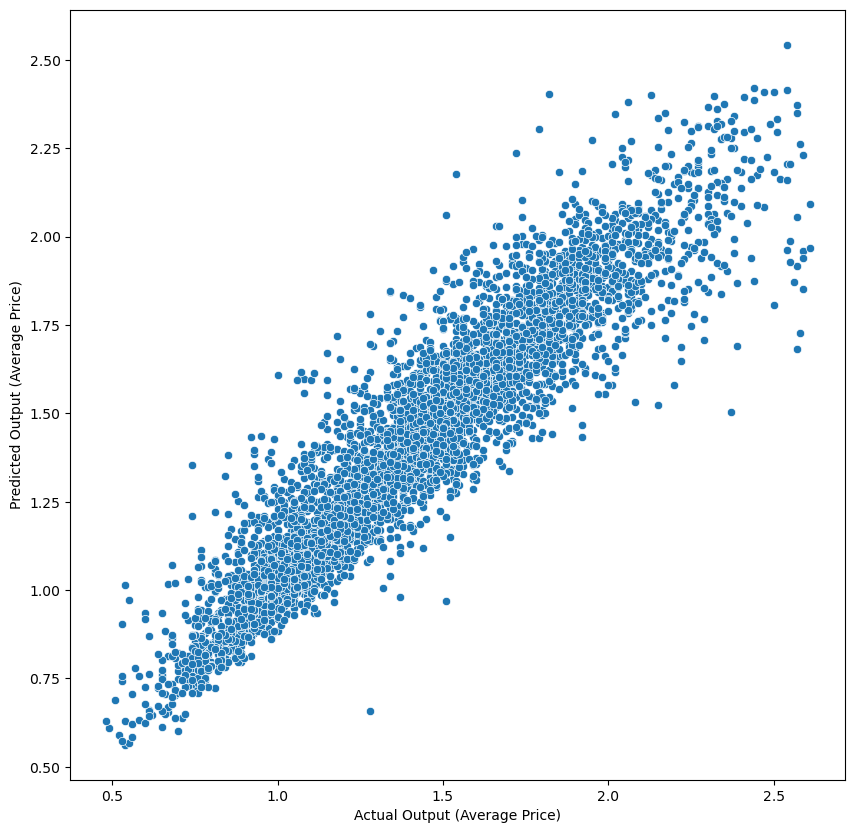

In [218]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual Output (Average Price)")
plt.ylabel("Predicted Output (Average Price)")
plt.show()

# Classification Problem

# Prediction for Region

# Import the needed libraries for classification model

In [220]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import GridSearchCV, cross_val_score,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,QuantileTransformer,PowerTransformer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score,auc,roc_curve,RocCurveDisplay,r2_score
from imblearn.over_sampling import SMOTE

# Display the first five records of avocado dataframe

In [222]:
avocado_df.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070329  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912849  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680304  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277104  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840357  6.848515  10.688288  4.340944    8.729874   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0    9.060055    4.545951          0.0     0  2015       0  
1    9.149429    4.589955          0.0     0  2015       0  
2    8.992584    4.645736          0.0     0  2015       0  
3    8.644425    4.903495          0.0     0  2015       0  
4    8.697389    5.291746          0.0     0  2015       0

# Split the input data as x(input) and y(Label/Output)

In [224]:
x_classif=avocado_df.drop(columns='region',axis=1)
x_classif.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070329  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912849  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680304  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277104  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840357  6.848515  10.688288  4.340944    8.729874   

   Small Bags  Large Bags  XLarge Bags  type  year  
0    9.060055    4.545951          0.0     0  2015  
1    9.149429    4.589955          0.0     0  2015  
2    8.992584    4.645736          0.0     0  2015  
3    8.644425    4.903495          0.0     0  2015  
4    8.697389    5.291746          0.0     0  2015

In [226]:
y_classif=avocado_df['region']
y_classif.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [228]:
x_classif=x_classif.drop(columns=['Total Volume','Total Bags'],axis=1)

In [230]:
x_classif.head()

AveragePrice      4046       4225      4770  Small Bags  Large Bags  \
0          1.33  6.944801  10.905146  3.895080    9.060055    4.545951   
1          1.35  6.515127  10.706381  4.083115    9.149429    4.589955   
2          0.93  6.679222  11.600485  4.879007    8.992584    4.645736   
3          1.08  7.032624  11.184108  4.298373    8.644425    4.903495   
4          1.28  6.848515  10.688288  4.340944    8.697389    5.291746   

   XLarge Bags  type  year  
0          0.0     0  2015  
1          0.0     0  2015  
2          0.0     0  2015  
3          0.0     0  2015  
4          0.0     0  2015

# Apply standardScaler to standardize the x input data

In [232]:
sc=StandardScaler()
x_scale_classif=sc.fit_transform(x_classif)
x_scaled_classif=pd.DataFrame(x_scale_classif,columns=x_classif.columns)
x_scaled_classif.head()

AveragePrice      4046      4225      4770  Small Bags  Large Bags  \
0     -0.169138 -0.621970  0.364645 -0.290628   -0.260686   -0.681178   
1     -0.117463 -0.750225  0.293316 -0.245252   -0.225831   -0.669676   
2     -1.202631 -0.701243  0.614176 -0.053192   -0.287000   -0.655096   
3     -0.815071 -0.595755  0.464754 -0.193307   -0.422780   -0.587723   
4     -0.298324 -0.650710  0.286823 -0.183034   -0.402124   -0.486242   

   XLarge Bags      type      year  
0    -0.649974 -0.988531 -1.217681  
1    -0.649974 -0.988531 -1.217681  
2    -0.649974 -0.988531 -1.217681  
3    -0.649974 -0.988531 -1.217681  
4    -0.649974 -0.988531 -1.217681

# Instantiate the classification models

In [268]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC()
knns=KNeighborsClassifier()
adaboost=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
bags=BaggingClassifier()
extra=ExtraTreesClassifier()

# Apply cross validation technique to get best performing model

In [238]:
models=[dtc,rfc,svc,knn,ada,gbc,bag,extra]
for i in models:
    cvs=cross_val_score(i,x_scaled_classif,y_classif,cv=5,scoring='accuracy',n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n mean of the cross validation is",np.mean(cvs),"\n")

Cross validation score for DecisionTreeClassifier() is [0.50124757 0.66980871 0.68302829 0.55047144 0.42845258] 
 mean of the cross validation is 0.5666017162351937 

Cross validation score for RandomForestClassifier() is [0.66814527 0.82062656 0.80005546 0.70743206 0.51053799] 
 mean of the cross validation is 0.7013594691163313 

Cross validation score for SVC() is [0.58441918 0.64957028 0.70965058 0.64531337 0.41791459] 
 mean of the cross validation is 0.6013736001406029 

Cross validation score for KNeighborsClassifier() is [0.58247851 0.45162185 0.61175818 0.51525236 0.44425957] 
 mean of the cross validation is 0.5210740931580471 

Cross validation score for AdaBoostClassifier() is [0.03714999 0.04823953 0.04187465 0.0978924  0.05324459] 
 mean of the cross validation is 0.05568023352632406 

Cross validation score for GradientBoostingClassifier() is [0.52952592 0.77044635 0.73349972 0.64087632 0.40599002] 
 mean of the cross validation is 0.6160676665404254 

Cross validation s

# Get the best random state and maximum accuracy for the best performing model

In [ ]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled_classif,y_classif,test_size=0.30,random_state=i)
    extra.fit(x_train,y_train)
    y_pred=extra.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Maximum accuracy",maxacc,"Maximum Random state",maxrs)

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled_classif,y_classif,test_size=0.30,random_state=62)

In [245]:
x_train.shape

(12622, 9)

In [247]:
x_test.shape

(5410, 9)

In [249]:
y_train.shape

(12622,)

In [251]:
y_test.shape

(5410,)

# Build the model fit on the train dataset and predict the output of the test dataset

In [272]:
model_metrics=[]
models_data=[(knns, "KNearest Neighbor"),
               (svc, "SupportVectorClassifier"),
               (dtc, "DecisonTreeClassifier"),
               (rfc, "RandomForestClassifier"),
               (adaboost, "AdaBoostClassifier"),
               (gbc, "GradientBoostingClassifier"),
               (bags, "BaggingClassifier"),
               (extra, "ExtraTreesClassifier")]

for model,model_name in models_data:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    r2_train=r2_score(y_train,y_pred_train)
    r2=r2_score(y_test,y_pred)
    acc=accuracy_score(y_test,y_pred)
    model_perfms={"Model Name":model_name,"R-Score(Training Data)":r2_train,"R-Score(Test Data)":r2,"Accuracy(Test Data)":acc}
    model_metrics.append(model_perfms)
df1=pd.DataFrame(model_metrics)
df1=df1.sort_values(by="Accuracy(Test Data)",ascending=False)
df1

Model Name  R-Score(Training Data)  R-Score(Test Data)  \
7        ExtraTreesClassifier                1.000000            0.862982   
3      RandomForestClassifier                1.000000            0.822006   
6           BaggingClassifier                0.987861            0.738486   
5  GradientBoostingClassifier                0.967813            0.668233   
0           KNearest Neighbor                0.781597            0.638091   
1     SupportVectorClassifier                0.655280            0.619879   
2       DecisonTreeClassifier                1.000000            0.592952   
4          AdaBoostClassifier               -0.970984           -1.002980   

   Accuracy(Test Data)  
7             0.931054  
3             0.917190  
6             0.870980  
5             0.838078  
0             0.824769  
1             0.799630  
2             0.797043  
4             0.045102

In [276]:
extra=ExtraTreesClassifier()
extra.fit(x_train,y_train)
y_pred=extra.predict(x_test)
y_pred_train=extra.predict(x_train)
y_pred
print("R-Score", r2_score(y_train,y_pred_train))
print("R-score for test data", r2_score(y_test,y_pred))
print("Accuracy Score for test data",accuracy_score(y_test,y_pred))

R-Score 1.0
R-score for test data 0.8698544144431997
Accuracy Score for test data 0.9314232902033271


# Hyperparameter tuning for random forest classifier

In [279]:
param_grids={"criterion":["gini", "entropy", "log_loss"],"max_features":["sqrt", "log2", None]}

In [281]:
param_grids

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None]}

In [283]:
gscv1=GridSearchCV(extra,param_grid=param_grids,cv=5,n_jobs=-1,scoring='accuracy')

In [285]:
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [287]:
gscv1.best_params_

{'criterion': 'gini', 'max_features': 'log2'}

In [289]:
extra1=ExtraTreesClassifier(criterion='gini',max_features='log2')
extra1.fit(x_train,y_train)
y_predextra=extra1.predict(x_test)
y_pred_train=extra1.predict(x_train)
y_predextra

array([31, 53, 48, ..., 37,  6, 45])

In [291]:
print("R-Score", r2_score(y_train,y_pred_train))
print("R-Score for test data",r2_score(y_test,y_predextra))
print("Accuracy Score for test data",accuracy_score(y_test,y_predextra))

R-Score 1.0
R-Score for test data 0.859170252619884
Accuracy Score for test data 0.9306839186691312


# Save the best model

In [294]:
import pickle

filename="Avocadoclassif.pkl"
pickle.dump(extra,open(filename,'wb'))

# Load the model and predict on the test data

In [297]:
import pickle

model=pickle.load(open("Avocadoclassif.pkl",'rb'))
y_predextra1=model.predict(x_test)
y_predextra1

array([31, 53, 48, ..., 37,  6, 45])

# Final dataFrame for the actual and predicted output

In [300]:
a=np.array(y_test)
df2=pd.DataFrame()
df2["Actual Output"]=a
df2["Predicted Output"]=y_predextra1
df2

Actual Output  Predicted Output
0                31                31
1                53                53
2                48                48
3                21                21
4                27                27
...             ...               ...
5405             28                28
5406              3                 3
5407             37                37
5408              6                 6
5409             45                45

[5410 rows x 2 columns]

# Lineplot shows the relationship between the Actual output and predicted output

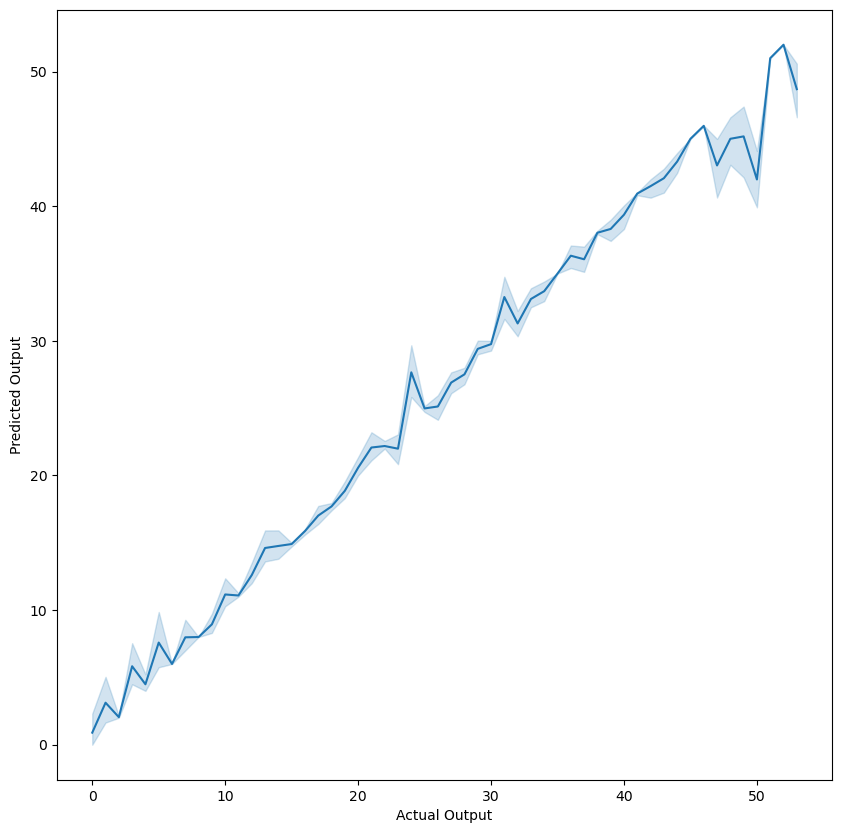

In [304]:
plt.figure(figsize=(10,10))
sns.lineplot(df2,x='Actual Output',y='Predicted Output')
plt.show()

The result from the above plot shows that when the values of actual ouput increases the values of predicted output increases. ExtraTreesClassifier model performs better compared to other models.